**currentMVPS.csv last updated on 2022/01/11**

Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

Read currentMVPRace.csv and pastMVPS.csv

In [2]:
currentMVPs = pd.read_csv('Data/currentMVPRace.csv')
pastMVPS = pd.read_csv('Data/pastMVPS.csv')

Split the data into a random train and test set (80% => training data, 20% => testing data)

In [3]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytrain = train[['Share']]
Xtest = test[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytest = test[['Share']]

Perform Random Forest Regression to figure out feature importance

In [4]:
RF = RandomForestRegressor(random_state = 100, criterion = 'mse')

In [5]:
RF.fit(Xtrain, Ytrain.values.ravel())
prediction = RF.predict(Xtest)
sorted = RF.feature_importances_.argsort()

Plot feature importance

Text(0.5, 0.98, 'Feature Importance')

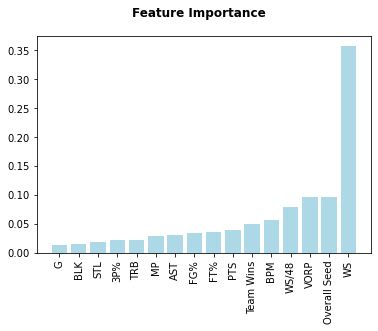

In [6]:
plt.bar(Xtrain.columns[sorted], RF.feature_importances_[sorted], color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("Feature Importance", weight = 'bold')

**Remove:**
- G => Weakest feature
- MP => Practically not important
- FT% => There have been many MVP winners with terrible FT%
- Team Wins => Overall Seed is a better feature
- BPM => VORP is a better feature
- WS/48 => WS is a better feature

Split the important features into a random train and test set (80% => training data, 20% => testing data)

In [7]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]
Ytrain = train[['Share']]
Xtest = test[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]
Ytest = test[['Share']]

Select important features from the current MVP race

In [8]:
currentMVPs.head(10)

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total-Games
0,1,Nikola Jokić,27,DEN,73.517241,46.655172,11,33.0,26.0,13.8,...,0.808,14.986207,0.296,9.896551,14.0,52,33,10.6,7.0,58
1,2,Giannis Antetokounmpo,27,MIL,66.966667,49.200000,9,32.7,29.4,11.2,...,0.721,13.393333,0.298,7.380000,11.3,49,36,9.8,5.4,60
2,3,Joel Embiid,27,PHI,65.034483,49.482757,7,32.9,26.9,11.2,...,0.813,11.734483,0.262,6.503448,9.9,46,35,8.3,4.6,58
3,4,Chris Paul,36,PHO,82.000000,67.862069,1,33.0,14.9,4.5,...,0.843,12.300000,0.218,4.948276,5.3,58,48,8.7,3.5,58
4,5,Rudy Gobert,29,UTA,62.206897,50.896552,6,32.1,15.7,14.8,...,0.689,11.451724,0.274,3.675862,5.3,44,36,8.1,2.6,58
5,6,Stephen Curry,33,GSW,75.050847,58.372881,2,34.8,25.8,5.3,...,0.919,10.006780,0.183,5.281356,6.0,54,42,7.2,3.8,59
6,7,Luka Dončić,22,DAL,61.152542,48.644068,10,35.4,27.5,9.2,...,0.731,6.810169,0.151,5.281356,7.7,44,35,4.9,3.8,59
7,8,Ja Morant,22,MEM,62.866667,56.033333,3,33.2,26.8,5.8,...,0.755,7.790000,0.178,4.236667,6.0,46,41,5.7,3.1,60
8,9,DeMar DeRozan,32,CHI,76.440698,52.813559,5,35.6,28.1,5.2,...,0.866,10.701695,0.190,3.613559,3.3,55,38,7.7,2.6,59
9,10,Devin Booker,25,PHO,72.103448,67.862069,1,34.1,25.5,5.2,...,0.863,7.068966,0.137,2.968966,2.8,51,48,5.0,2.1,58


In [9]:
currentMVPNames = currentMVPs.iloc[:,1]
currentMVPs = currentMVPs[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]

### KNN

In [10]:
KNN = neighbors.KNeighborsRegressor(
    n_neighbors=9,
    weights='uniform'
)

In [11]:
KNN.fit(Xtrain, Ytrain.values.ravel())

KNeighborsRegressor(n_neighbors=9)

In [12]:
KNNCurrentMVPsPrediction = KNN.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, KNNCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.28266666666666673
Giannis Antetokounmpo 0.2306666666666667
Joel Embiid 0.242
Chris Paul 0.3154444444444444
Rudy Gobert 0.09644444444444444
Stephen Curry 0.17677777777777778
Luka Dončić 0.16
Ja Morant 0.18666666666666665
DeMar DeRozan 0.18033333333333332
Devin Booker 0.131


Text(0.5, 0.98, 'KNN Prediction MVP Share')

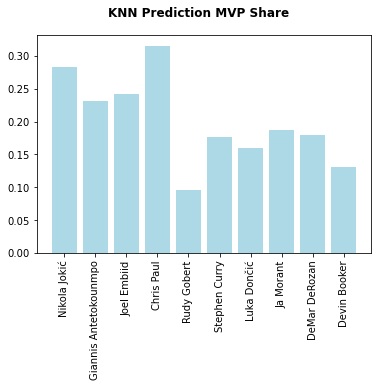

In [13]:
plt.bar(currentMVPNames, KNNCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("KNN Prediction MVP Share", weight = 'bold')

### MLP

In [14]:
MLP = MLPRegressor(
    solver='adam',
    activation='relu',
    learning_rate ='invscaling',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=5
)

In [15]:
MLP.fit(Xtrain, Ytrain.values.ravel())

MLPRegressor(hidden_layer_sizes=100, learning_rate='invscaling', max_iter=10000,
             random_state=5)

In [16]:
MLPCurrentMVPsPrediction = MLP.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, MLPCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.28313374034626704
Giannis Antetokounmpo 0.2550127558700217
Joel Embiid 0.2206712670938309
Chris Paul 0.23183765248278942
Rudy Gobert 0.1516173876018756
Stephen Curry 0.36185604934011106
Luka Dončić 0.10854754996783655
Ja Morant 0.21323780771825973
DeMar DeRozan 0.11844883226299685
Devin Booker 0.45077266981810316


Text(0.5, 0.98, 'MLP Prediction MVP Share')

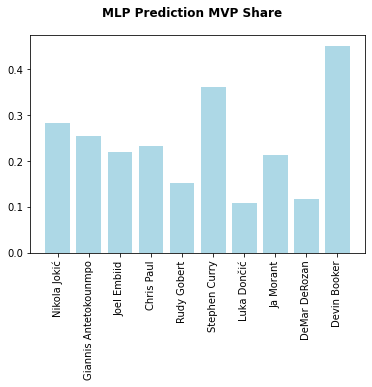

In [17]:
plt.bar(currentMVPNames, MLPCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("MLP Prediction MVP Share", weight = 'bold')

### RF

In [18]:
RF = RandomForestRegressor(random_state = 100, criterion = 'mse')

In [19]:
RF.fit(Xtrain, Ytrain.values.ravel())

RandomForestRegressor(random_state=100)

In [20]:
RFCurrentMVPsPrediction = RF.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, RFCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.4368999999999999
Giannis Antetokounmpo 0.27401999999999993
Joel Embiid 0.2154999999999999
Chris Paul 0.20315999999999998
Rudy Gobert 0.13201000000000002
Stephen Curry 0.22065000000000004
Luka Dončić 0.12829000000000002
Ja Morant 0.15361
DeMar DeRozan 0.18427000000000004
Devin Booker 0.11177


Text(0.5, 0.98, 'RF Prediction MVP Share')

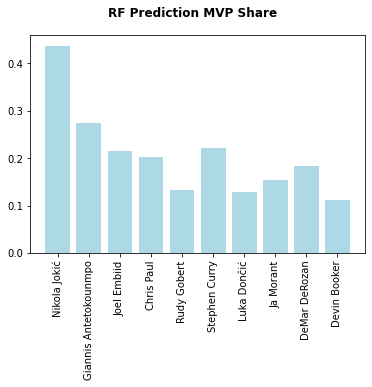

In [21]:
plt.bar(currentMVPNames, RFCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("RF Prediction MVP Share", weight = 'bold')

### XG Boost Regressor

In [22]:
XGBR = XGBRegressor(random_state = 100)

In [23]:
XGBR.fit(Xtrain, Ytrain.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
XGBRCurrentMVPsPrediction = XGBR.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, XGBRCurrentMVPsPrediction):
    print(i, j)

Nikola Jokić 0.32753750681877136
Giannis Antetokounmpo 0.2741043269634247
Joel Embiid 0.2190142571926117
Chris Paul 0.16320818662643433
Rudy Gobert 0.06966126710176468
Stephen Curry 0.15245117247104645
Luka Dončić 0.0773693397641182
Ja Morant 0.23897196352481842
DeMar DeRozan 0.17475175857543945
Devin Booker 0.04319985210895538


Text(0.5, 0.98, 'XG Boost Regressor Prediction MVP Share')

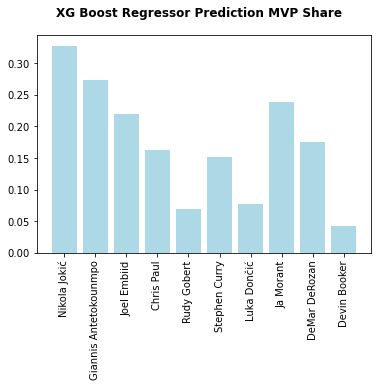

In [25]:
plt.bar(currentMVPNames, XGBRCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("XG Boost Regressor Prediction MVP Share", weight = 'bold')

### Mean

In [26]:
mean = []

for (i, j, k, l) in zip(KNNCurrentMVPsPrediction, MLPCurrentMVPsPrediction, RFCurrentMVPsPrediction, XGBRCurrentMVPsPrediction):
    mean.append((i + j + k + l) / 4)
    
for (i, j) in zip(currentMVPNames, mean):
    print(i, j)

Nikola Jokić 0.33255947845792627
Giannis Antetokounmpo 0.2584509373750282
Joel Embiid 0.22429638107161062
Chris Paul 0.22841257088841704
Rudy Gobert 0.11243327478702118
Stephen Curry 0.22793374989723383
Luka Dončić 0.1185517224329887
Ja Morant 0.1981216094774362
DeMar DeRozan 0.16445098104294242
Devin Booker 0.18418563048176465


Text(0.5, 0.98, 'Mean Prediction MVP Share')

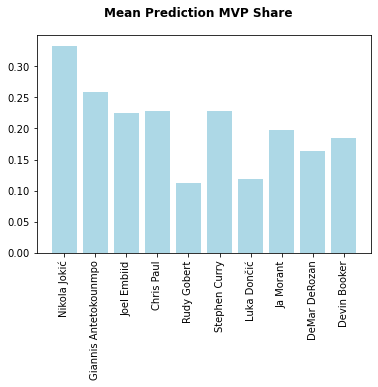

In [27]:
plt.bar(currentMVPNames, mean, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("Mean Prediction MVP Share", weight = 'bold')